In [ ]:
# Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle.
# Explore the relationships between variables and identify patterns and trends in the data.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
titanic_df = pd.read_csv('/content/gender_submission.csv')
titanic_df = pd.read_csv('/content/test.csv')
titanic_df = pd.read_csv('/content/train.csv')

In [ ]:
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
print(titanic_df.tail())

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [ ]:
# Check for missing values
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Data Cleaning
# Handling missing values
# Age: fill missing values with median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [ ]:
# Embarked: fill missing values with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [ ]:
# Cabin: drop the column due to too many missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

In [ ]:
# Dropping unnecessary columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
# Encoding 'Sex' column
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# One-hot encoding for 'Embarked' column
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])

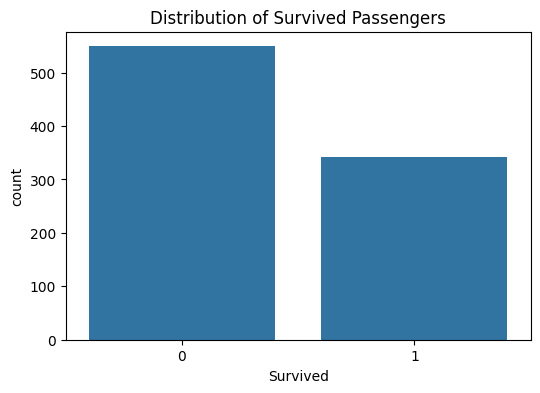

In [ ]:
# Exploratory Data Analysis (EDA)
# Distribution of Survived passengers
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Distribution of Survived Passengers')
plt.show()

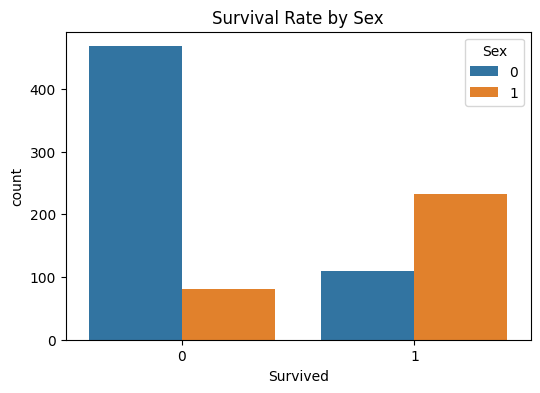

In [ ]:
# Survival rate by Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Rate by Sex')
plt.show()

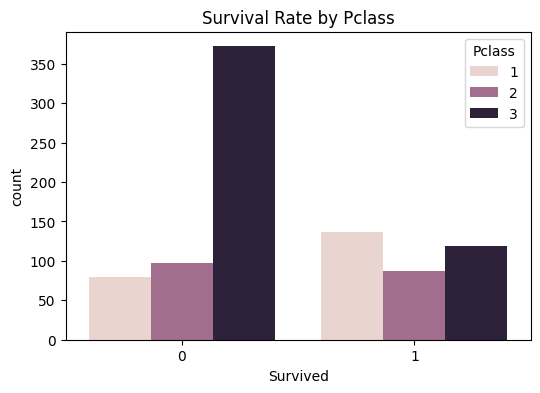

In [ ]:
# Survival rate by Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival Rate by Pclass')
plt.show()

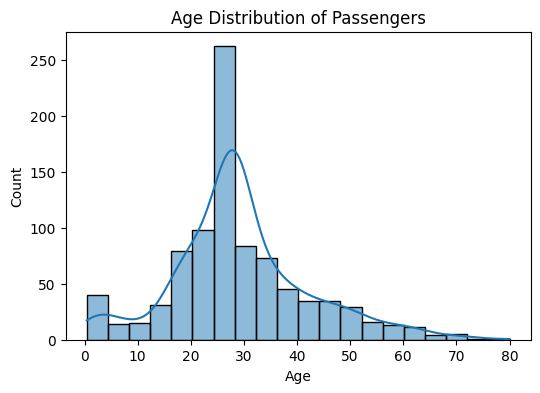

In [ ]:
# Age distribution of passengers
plt.figure(figsize=(6, 4))
sns.histplot(titanic_df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

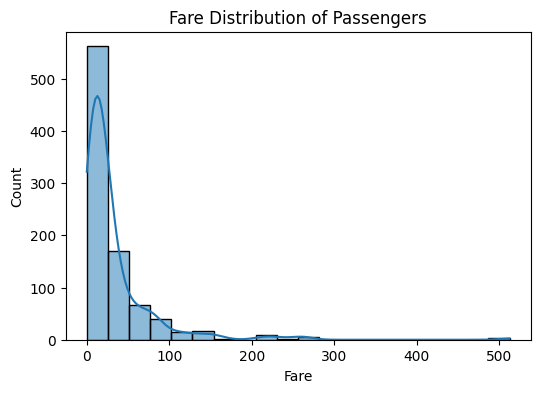

In [ ]:
# Fare distribution of passengers
plt.figure(figsize=(6, 4))
sns.histplot(titanic_df['Fare'], bins=20, kde=True)
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

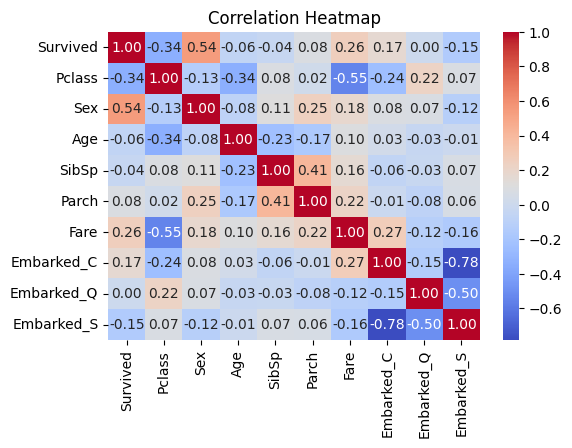

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()